<a href="https://colab.research.google.com/github/bahmad6890/machine-learning/blob/master/merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering with simple moving avg and removing outliers

In [ ]:
dataset = "Healthy"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
df = pd.read_csv('../datasets/orignal_dataset/'+dataset+'.csv')
df.head()

,speed,vibration
0,4.188767,-0.002199
1,4.200603,-0.001871
2,4.208165,-0.001542
3,4.226576,-0.001871
4,4.240385,-0.002199


In [ ]:
pd.set_option('display.max_rows', 500)

# Taking Simple Moving Average

In [ ]:
#moving avg window
window = 50

In [ ]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df = df. dropna()
df


,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128
...,...,...,...
1999995,0.036675,0.010297,0.003575
1999996,0.036346,0.009968,0.003490
1999997,0.037003,0.009639,0.003398
1999998,0.036346,0.009310,0.003463


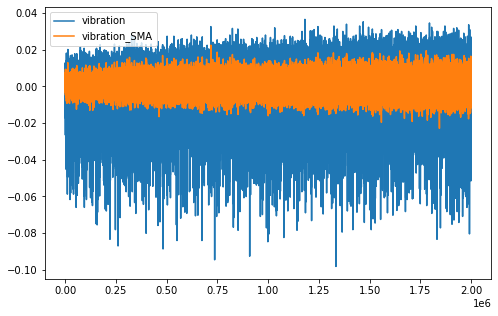

In [ ]:
#df = newdf.iloc[0:1000]
#df = newdf
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))
#plt.plot(df.vsI, df.vbI, label='Vibration')
#plt.plot(df.vsI, df.pandas_SMA_3, label='Vibration 20 records SMA', color='orange')

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


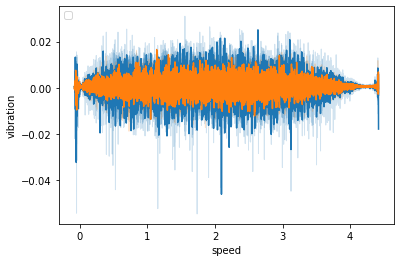

In [ ]:
sns.lineplot(x="speed", y="vibration",
                data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA",
                data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [ ]:
upper_boundary_speed = 3.5
lower_boundary_speed  = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2


,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128
...,...,...,...
1999990,0.036346,0.006679,0.003792
1999995,0.036675,0.010297,0.003575
1999996,0.036346,0.009968,0.003490
1999997,0.037003,0.009639,0.003398


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


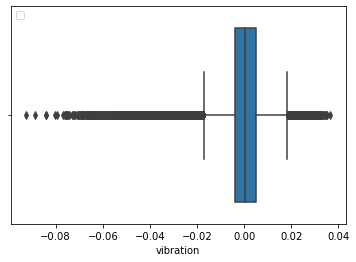

In [ ]:
sns.boxplot(df2['vibration']) 
#sns.boxplot(InnerFault['pandas_SMA_3']) 
plt.legend(loc='upper left')
plt.show()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


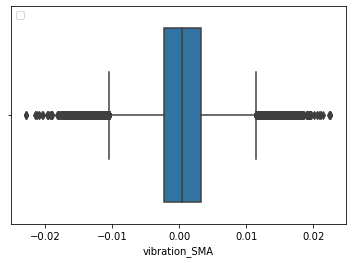

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df2['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


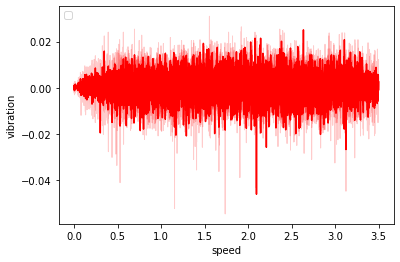

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration', data = df2 , color = 'red')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


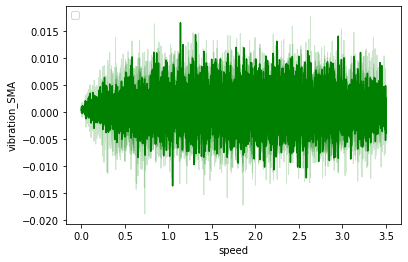

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2 , color = 'green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# calculate summary statistics

data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
# identify outliers
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean , data_std , lower, upper , cut_off

(0.0005213169459554077,
 0.0041794530755145335,
 -0.016196495356102725,
 0.017239129248013543,
 0.016717812302058134)

In [ ]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


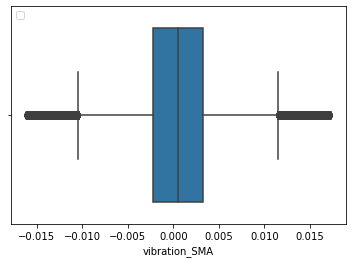

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df3['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


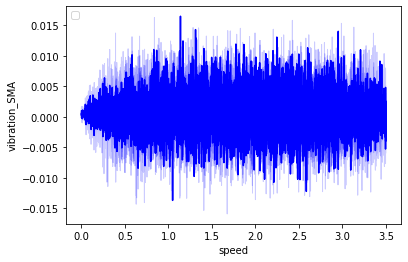

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3 , color = 'blue')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


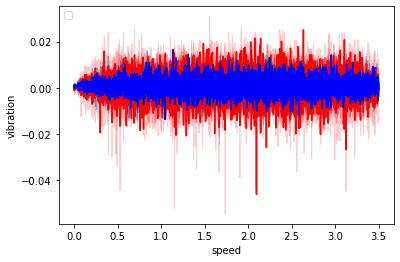

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration', data = df2, color='red')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2, color= 'green')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3, color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
finalised  = df3
finalised['Faults'] = dataset
finalised

<ipython-input-20-2afd30414ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,speed,vibration,vibration_SMA,Faults
49,0.036346,0.004049,-0.000680,Healthy
50,0.037003,0.003720,-0.000562,Healthy
51,0.036346,0.005693,-0.000411,Healthy
52,0.036346,0.005035,-0.000279,Healthy
53,0.036017,0.005693,-0.000128,Healthy
...,...,...,...,...
1999990,0.036346,0.006679,0.003792,Healthy
1999995,0.036675,0.010297,0.003575,Healthy
1999996,0.036346,0.009968,0.003490,Healthy
1999997,0.037003,0.009639,0.003398,Healthy


In [ ]:
finalised.to_csv(r'../datasets/filtered/'+dataset+'.csv',index = False);

In [ ]:
dropouts = len(df) - len(finalised)
print("Total Discarded values = " + str(dropouts) )

Total Discarded values = 985458


In [ ]:
df = pd.read_csv('../datasets/filtered/'+dataset+'.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.036346,0.004049,-0.000680,Healthy
1,0.037003,0.003720,-0.000562,Healthy
2,0.036346,0.005693,-0.000411,Healthy
3,0.036346,0.005035,-0.000279,Healthy
4,0.036017,0.005693,-0.000128,Healthy
...,...,...,...,...
1014537,0.036346,0.006679,0.003792,Healthy
1014538,0.036675,0.010297,0.003575,Healthy
1014539,0.036346,0.009968,0.003490,Healthy
1014540,0.037003,0.009639,0.003398,Healthy


# Filtering with simple moving avg and removing outliers

In [ ]:
dataset = "BallFault"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
df = pd.read_csv('../datasets/orignal_dataset/'+dataset+'.csv')
df.head()

,speed,vibration
0,4.237426,0.004049
1,4.226905,0.004049
2,4.224604,0.004706
3,0.036346,0.006351
4,0.035688,0.007666


In [ ]:
pd.set_option('display.max_rows', 500)

# Taking Simple Moving Average

In [ ]:
#moving avg window
window = 50

In [ ]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df = df. dropna()
df


,speed,vibration,vibration_SMA,Faults
49,0.036017,-0.001871,0.001727,BallFault
50,0.037003,-0.004830,0.001595,BallFault
51,0.036017,-0.011078,0.001299,BallFault
52,0.036017,-0.012065,0.000971,BallFault
53,0.035360,-0.012723,0.000602,BallFault
...,...,...,...,...
1014957,0.036017,0.002404,-0.000864,BallFault
1014958,0.037332,-0.015024,-0.000601,BallFault
1014959,0.036675,-0.007461,-0.000345,BallFault
1014960,0.036346,0.004706,-0.000187,BallFault


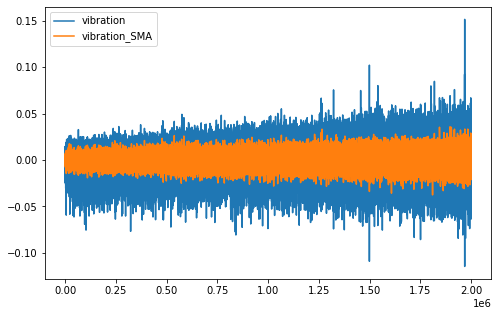

In [ ]:
#df = newdf.iloc[0:1000]
#df = newdf
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))
#plt.plot(df.vsI, df.vbI, label='Vibration')
#plt.plot(df.vsI, df.pandas_SMA_3, label='Vibration 20 records SMA', color='orange')

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


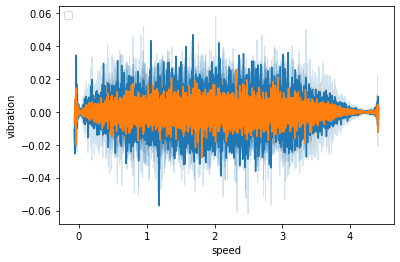

In [ ]:
sns.lineplot(x="speed", y="vibration",
                data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA",
                data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [ ]:
upper_boundary_speed = 3.5
lower_boundary_speed  = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2


,speed,vibration,vibration_SMA
49,0.036346,0.001747,-0.002607
50,0.036346,0.003720,-0.002614
51,0.036346,0.004377,-0.002607
52,0.039634,0.005693,-0.002587
53,0.036017,0.005693,-0.002601
...,...,...,...
1999991,0.036017,0.002404,-0.003574
1999995,0.037332,-0.015024,-0.003883
1999996,0.036675,-0.007461,-0.004173
1999997,0.036346,0.004706,-0.004120


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


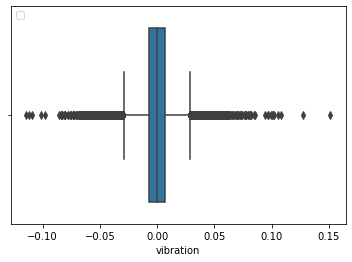

In [ ]:
sns.boxplot(df2['vibration']) 
#sns.boxplot(InnerFault['pandas_SMA_3']) 
plt.legend(loc='upper left')
plt.show()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


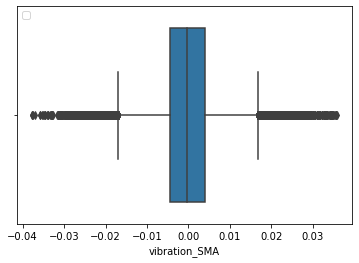

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df2['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


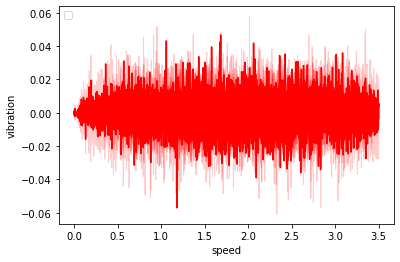

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration', data = df2 , color = 'red')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


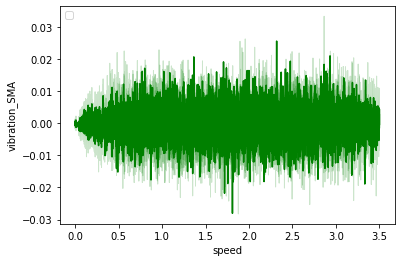

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2 , color = 'green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# calculate summary statistics

data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
# identify outliers
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean , data_std , lower, upper , cut_off

(-0.00021703631422145033,
 0.006520325195359832,
 -0.02629833709566078,
 0.025864264467217877,
 0.026081300781439328)

In [ ]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
49,0.036346,0.001747,-0.002607
50,0.036346,0.003720,-0.002614
51,0.036346,0.004377,-0.002607
52,0.039634,0.005693,-0.002587
53,0.036017,0.005693,-0.002601


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


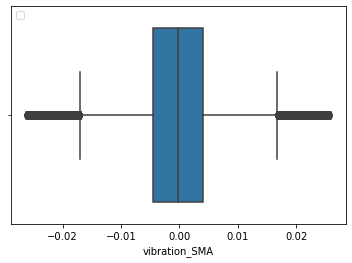

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df3['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


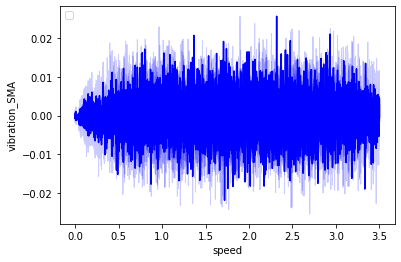

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3 , color = 'blue')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


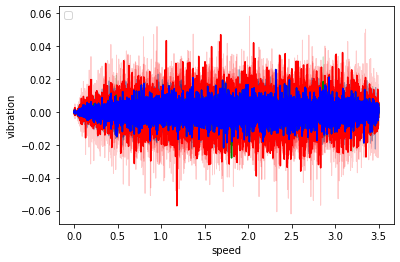

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration', data = df2, color='red')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2, color= 'green')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3, color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
finalised  = df3
finalised['Faults'] = dataset
finalised

<ipython-input-20-2afd30414ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,speed,vibration,vibration_SMA,Faults
49,0.036346,0.001747,-0.002607,BallFault
50,0.036346,0.003720,-0.002614,BallFault
51,0.036346,0.004377,-0.002607,BallFault
52,0.039634,0.005693,-0.002587,BallFault
53,0.036017,0.005693,-0.002601,BallFault
...,...,...,...,...
1999991,0.036017,0.002404,-0.003574,BallFault
1999995,0.037332,-0.015024,-0.003883,BallFault
1999996,0.036675,-0.007461,-0.004173,BallFault
1999997,0.036346,0.004706,-0.004120,BallFault


In [ ]:
finalised.to_csv(r'../datasets/filtered/'+dataset+'.csv',index = False);

In [ ]:
dropouts = len(df) - len(finalised)
print("Total Discarded values = " + str(dropouts) )

Total Discarded values = 985038


In [ ]:
df = pd.read_csv('../datasets/filtered/'+dataset+'.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.036346,0.001747,-0.002607,BallFault
1,0.036346,0.003720,-0.002614,BallFault
2,0.036346,0.004377,-0.002607,BallFault
3,0.039634,0.005693,-0.002587,BallFault
4,0.036017,0.005693,-0.002601,BallFault
...,...,...,...,...
1014957,0.036017,0.002404,-0.003574,BallFault
1014958,0.037332,-0.015024,-0.003883,BallFault
1014959,0.036675,-0.007461,-0.004173,BallFault
1014960,0.036346,0.004706,-0.004120,BallFault


# Filtering with simple moving avg and removing outliers

In [ ]:
dataset = "InnerFault"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
df = pd.read_csv('../datasets/orignal_dataset/'+dataset+'.csv')
df.head()

,speed,vibration
0,4.171342,-0.016998
1,4.194685,-0.014367
2,4.208494,-0.011407
3,4.163123,-0.009434
4,4.237097,-0.007790


In [ ]:
pd.set_option('display.max_rows', 500)

# Taking Simple Moving Average

In [ ]:
#moving avg window
window = 50

In [ ]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df = df. dropna()
df


,speed,vibration,vibration_SMA
49,4.275564,0.004706,0.002036
50,4.340333,0.005693,0.002490
51,4.401485,0.009639,0.002970
52,0.037990,0.013585,0.003470
53,0.037332,0.013585,0.003930
...,...,...,...
1999995,4.275564,0.038249,0.005575
1999996,0.037661,0.052389,0.006627
1999997,0.037332,0.077710,0.008100
1999998,0.037661,0.090535,0.010034


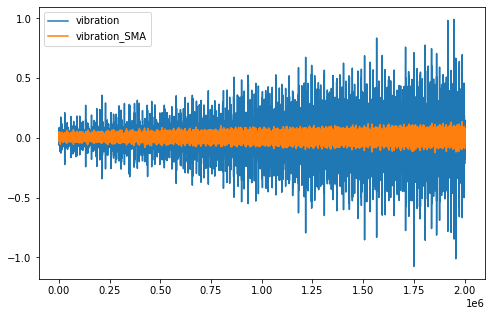

In [ ]:
#df = newdf.iloc[0:1000]
#df = newdf
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))
#plt.plot(df.vsI, df.vbI, label='Vibration')
#plt.plot(df.vsI, df.pandas_SMA_3, label='Vibration 20 records SMA', color='orange')

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


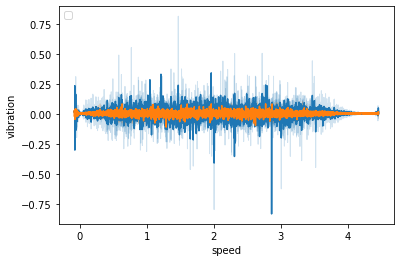

In [ ]:
sns.lineplot(x="speed", y="vibration",
                data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA",
                data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [ ]:
upper_boundary_speed = 3.5
lower_boundary_speed  = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2


,speed,vibration,vibration_SMA
52,0.037990,0.013585,0.003470
53,0.037332,0.013585,0.003930
54,0.037003,0.011612,0.004318
55,0.037990,0.009639,0.004601
56,0.037003,0.008981,0.004844
...,...,...,...
1999991,0.037003,0.035947,0.000773
1999996,0.037661,0.052389,0.006627
1999997,0.037332,0.077710,0.008100
1999998,0.037661,0.090535,0.010034


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


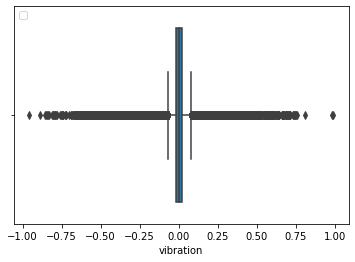

In [ ]:
sns.boxplot(df2['vibration']) 
#sns.boxplot(InnerFault['pandas_SMA_3']) 
plt.legend(loc='upper left')
plt.show()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


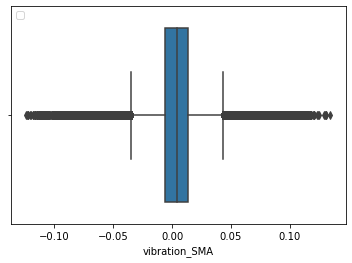

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df2['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


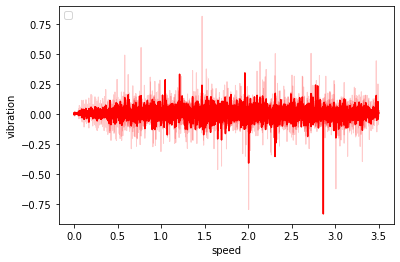

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration', data = df2 , color = 'red')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


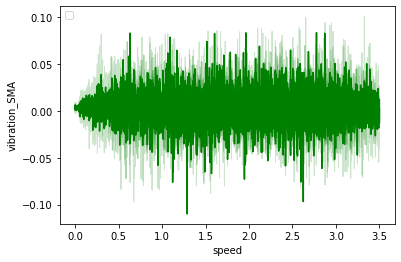

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2 , color = 'green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# calculate summary statistics

data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
# identify outliers
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean , data_std , lower, upper , cut_off

(0.00377854772689581,
 0.01908355890717314,
 -0.07255568790179674,
 0.08011278335558837,
 0.07633423562869256)

In [ ]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
52,0.037990,0.013585,0.003470
53,0.037332,0.013585,0.003930
54,0.037003,0.011612,0.004318
55,0.037990,0.009639,0.004601
56,0.037003,0.008981,0.004844
...,...,...,...
1999991,0.037003,0.035947,0.000773
1999996,0.037661,0.052389,0.006627
1999997,0.037332,0.077710,0.008100
1999998,0.037661,0.090535,0.010034


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


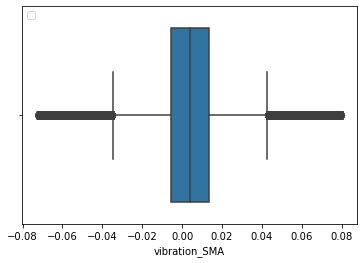

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df3['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


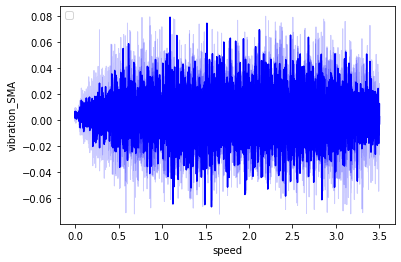

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3 , color = 'blue')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


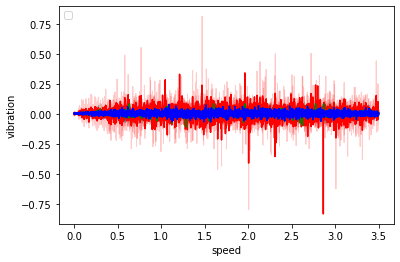

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration', data = df2, color='red')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2, color= 'green')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3, color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
finalised  = df3
finalised['Faults'] = dataset
finalised

<ipython-input-28-2afd30414ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,speed,vibration,vibration_SMA,Faults
52,0.037990,0.013585,0.003470,InnerFault
53,0.037332,0.013585,0.003930,InnerFault
54,0.037003,0.011612,0.004318,InnerFault
55,0.037990,0.009639,0.004601,InnerFault
56,0.037003,0.008981,0.004844,InnerFault
...,...,...,...,...
1999991,0.037003,0.035947,0.000773,InnerFault
1999996,0.037661,0.052389,0.006627,InnerFault
1999997,0.037332,0.077710,0.008100,InnerFault
1999998,0.037661,0.090535,0.010034,InnerFault


In [ ]:
finalised.to_csv(r'../datasets/filtered/'+dataset+'.csv',index = False);

In [ ]:
df = pd.read_csv('../datasets/filtered/'+dataset+'.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.037990,0.013585,0.003470,InnerFault
1,0.037332,0.013585,0.003930,InnerFault
2,0.037003,0.011612,0.004318,InnerFault
3,0.037990,0.009639,0.004601,InnerFault
4,0.037003,0.008981,0.004844,InnerFault
...,...,...,...,...
1011762,0.037003,0.035947,0.000773,InnerFault
1011763,0.037661,0.052389,0.006627,InnerFault
1011764,0.037332,0.077710,0.008100,InnerFault
1011765,0.037661,0.090535,0.010034,InnerFault


# Filtering with simple moving avg and removing outliers

In [ ]:
dataset = "outerFault"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
df = pd.read_csv('../datasets/orignal_dataset/'+dataset+'.csv')
df.head()

,speed,vibration
0,4.205863,0.002076
1,4.211781,0.002733
2,4.221645,0.000431
3,0.033387,0.000760
4,0.037332,0.000431


In [ ]:
pd.set_option('display.max_rows', 500)

# Taking Simple Moving Average

In [ ]:
#moving avg window
window = 50

In [ ]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df = df. dropna()
df


,speed,vibration,vibration_SMA
49,0.037661,-0.008119,0.001576
50,0.038976,-0.007132,0.001392
51,0.037661,-0.006146,0.001214
52,0.037990,-0.003844,0.001128
53,0.037332,-0.003515,0.001043
...,...,...,...
1999995,0.037003,-0.003515,-0.003015
1999996,0.037332,-0.006803,-0.002923
1999997,0.037003,-0.010749,-0.002897
1999998,0.037003,-0.013380,-0.002969


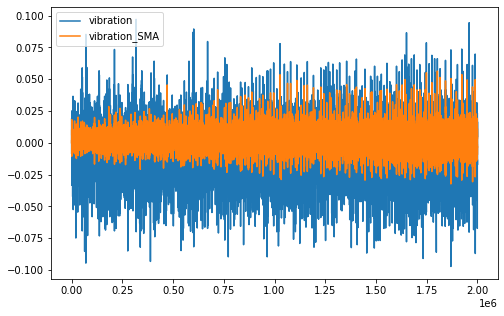

In [ ]:
#df = newdf.iloc[0:1000]
#df = newdf
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))
#plt.plot(df.vsI, df.vbI, label='Vibration')
#plt.plot(df.vsI, df.pandas_SMA_3, label='Vibration 20 records SMA', color='orange')

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


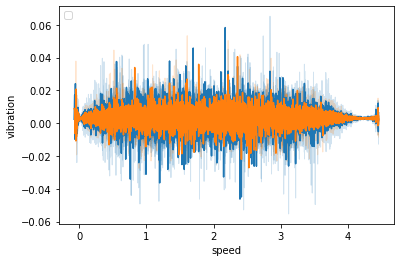

In [ ]:
sns.lineplot(x="speed", y="vibration",
                data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA",
                data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [ ]:
upper_boundary_speed = 3.5
lower_boundary_speed  = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2


,speed,vibration,vibration_SMA
49,0.037661,-0.008119,0.001576
50,0.038976,-0.007132,0.001392
51,0.037661,-0.006146,0.001214
52,0.037990,-0.003844,0.001128
53,0.037332,-0.003515,0.001043
...,...,...,...
1999989,0.037332,-0.004501,-0.003567
1999995,0.037003,-0.003515,-0.003015
1999996,0.037332,-0.006803,-0.002923
1999997,0.037003,-0.010749,-0.002897


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


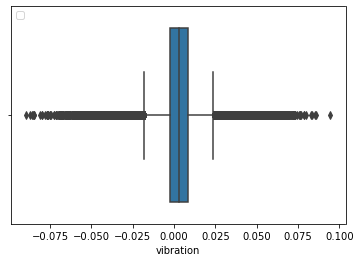

In [ ]:
sns.boxplot(df2['vibration']) 
#sns.boxplot(InnerFault['pandas_SMA_3']) 
plt.legend(loc='upper left')
plt.show()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


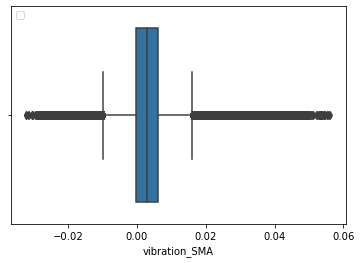

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df2['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


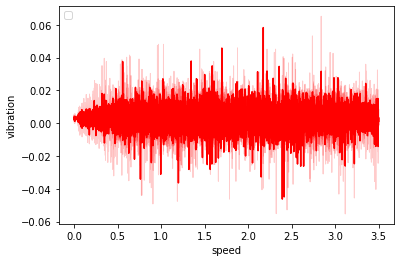

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration', data = df2 , color = 'red')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


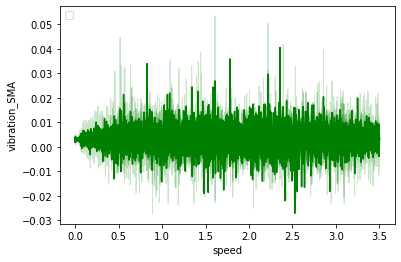

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2 , color = 'green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# calculate summary statistics

data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
# identify outliers
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean , data_std , lower, upper , cut_off

(0.003030168348267698,
 0.0055065114429361925,
 -0.01899587742347707,
 0.02505621412001247,
 0.02202604577174477)

In [ ]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
49,0.037661,-0.008119,0.001576
50,0.038976,-0.007132,0.001392
51,0.037661,-0.006146,0.001214
52,0.037990,-0.003844,0.001128
53,0.037332,-0.003515,0.001043


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


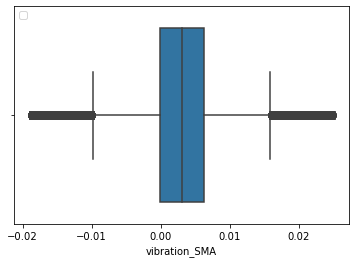

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df3['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


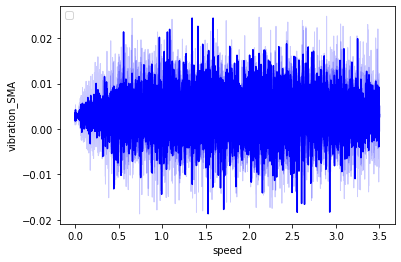

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3 , color = 'blue')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


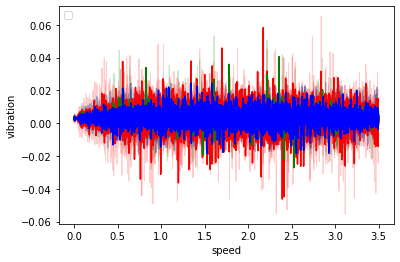

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration', data = df2, color='red')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2, color= 'green')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3, color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
finalised  = df3
finalised['Faults'] = dataset
finalised

<ipython-input-20-2afd30414ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,speed,vibration,vibration_SMA,Faults
49,0.037661,-0.008119,0.001576,outerFault
50,0.038976,-0.007132,0.001392,outerFault
51,0.037661,-0.006146,0.001214,outerFault
52,0.037990,-0.003844,0.001128,outerFault
53,0.037332,-0.003515,0.001043,outerFault
...,...,...,...,...
1999989,0.037332,-0.004501,-0.003567,outerFault
1999995,0.037003,-0.003515,-0.003015,outerFault
1999996,0.037332,-0.006803,-0.002923,outerFault
1999997,0.037003,-0.010749,-0.002897,outerFault


In [ ]:
finalised.to_csv(r'../datasets/filtered/'+dataset+'.csv',index = False);

In [ ]:
dropouts = len(df) - len(finalised)
print("Total Discarded values = " + str(dropouts) )

Total Discarded values = 990587


In [ ]:
df = pd.read_csv('../datasets/filtered/'+dataset+'.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.037661,-0.008119,0.001576,outerFault
1,0.038976,-0.007132,0.001392,outerFault
2,0.037661,-0.006146,0.001214,outerFault
3,0.037990,-0.003844,0.001128,outerFault
4,0.037332,-0.003515,0.001043,outerFault
...,...,...,...,...
1009408,0.037332,-0.004501,-0.003567,outerFault
1009409,0.037003,-0.003515,-0.003015,outerFault
1009410,0.037332,-0.006803,-0.002923,outerFault
1009411,0.037003,-0.010749,-0.002897,outerFault


# Filtering with simple moving avg and removing outliers

In [ ]:
dataset = "combinedFault"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
df = pd.read_csv('../datasets/orignal_dataset/'+dataset+'.csv')
df.head()

,speed,vibration
0,4.081257,0.013585
1,4.160821,0.015229
2,4.182849,0.015229
3,4.199945,0.013585
4,4.199617,0.015229


In [ ]:
pd.set_option('display.max_rows', 500)

# Taking Simple Moving Average

In [ ]:
#moving avg window
window = 50

In [ ]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df = df. dropna()
df


,speed,vibration,vibration_SMA
49,4.081915,-0.015024,-0.004626
50,4.252221,-0.013051,-0.005159
51,4.312716,-0.013051,-0.005725
52,4.370580,-0.012723,-0.006284
53,0.039962,-0.012723,-0.006810
...,...,...,...
1999995,0.038976,0.027397,0.011303
1999996,0.038976,0.022135,0.011310
1999997,3.763002,0.020820,0.011349
1999998,4.166739,0.022135,0.011553


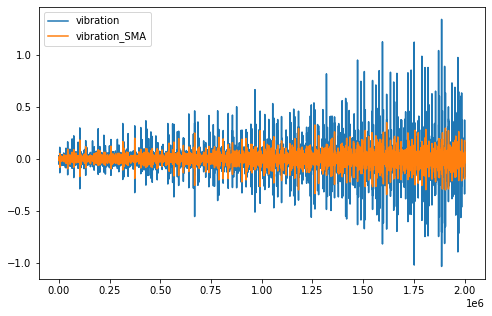

In [ ]:
#df = newdf.iloc[0:1000]
#df = newdf
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))
#plt.plot(df.vsI, df.vbI, label='Vibration')
#plt.plot(df.vsI, df.pandas_SMA_3, label='Vibration 20 records SMA', color='orange')

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


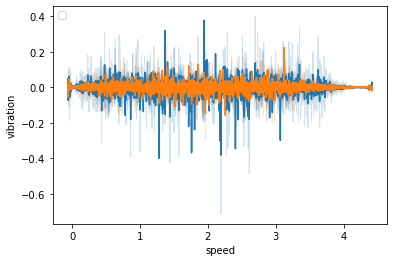

In [ ]:
sns.lineplot(x="speed", y="vibration",
                data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA",
                data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [ ]:
upper_boundary_speed = 3.5
lower_boundary_speed  = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2


,speed,vibration,vibration_SMA
53,0.039962,-0.012723,-0.006810
54,0.039305,-0.012394,-0.007362
55,0.039634,-0.012723,-0.007895
56,0.039634,-0.013051,-0.008388
57,0.038976,-0.015353,-0.008875
...,...,...,...
1999988,0.039634,0.046141,0.010751
1999989,0.039305,0.037262,0.011119
1999994,0.039962,0.031343,0.011250
1999995,0.038976,0.027397,0.011303


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


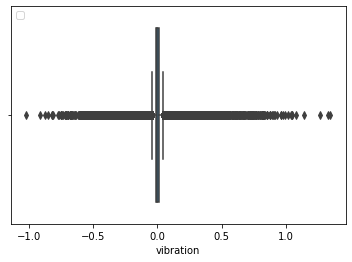

In [ ]:
sns.boxplot(df2['vibration']) 
#sns.boxplot(InnerFault['pandas_SMA_3']) 
plt.legend(loc='upper left')
plt.show()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


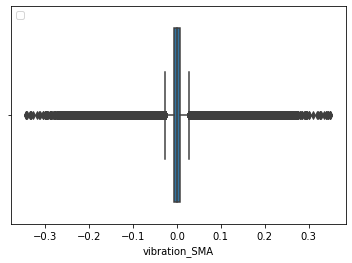

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df2['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


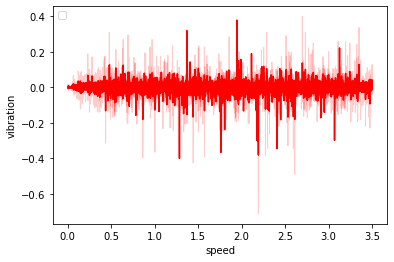

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration', data = df2 , color = 'red')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


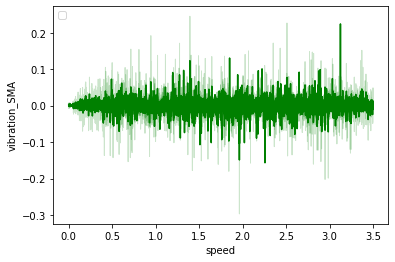

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2 , color = 'green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# calculate summary statistics

data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
# identify outliers
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean , data_std , lower, upper , cut_off

(0.0009121926649381253,
 0.01914166270195231,
 -0.07565445814287111,
 0.07747884347274736,
 0.07656665080780924)

In [ ]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
53,0.039962,-0.012723,-0.006810
54,0.039305,-0.012394,-0.007362
55,0.039634,-0.012723,-0.007895
56,0.039634,-0.013051,-0.008388
57,0.038976,-0.015353,-0.008875


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


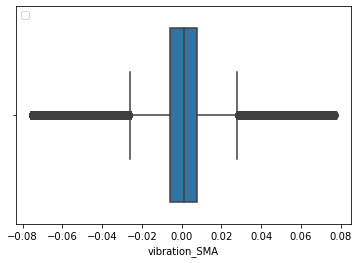

In [ ]:
#sns.boxplot(InnerFault['vibration']) 
sns.boxplot(df3['vibration_SMA']) 
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


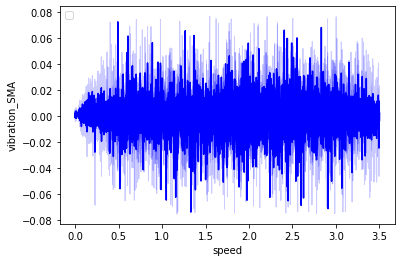

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3 , color = 'blue')
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


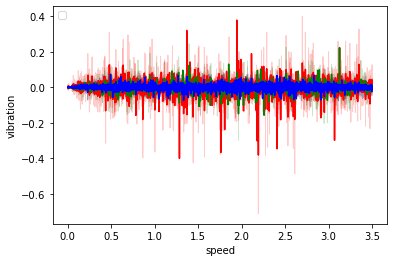

In [ ]:
sns.lineplot(x = 'speed',y = 'vibration', data = df2, color='red')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df2, color= 'green')
sns.lineplot(x = 'speed',y = 'vibration_SMA', data = df3, color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
finalised  = df3
finalised['Faults'] = dataset
finalised

<ipython-input-20-2afd30414ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalised['Faults'] = dataset


,speed,vibration,vibration_SMA,Faults
53,0.039962,-0.012723,-0.006810,combinedFault
54,0.039305,-0.012394,-0.007362,combinedFault
55,0.039634,-0.012723,-0.007895,combinedFault
56,0.039634,-0.013051,-0.008388,combinedFault
57,0.038976,-0.015353,-0.008875,combinedFault
...,...,...,...,...
1999988,0.039634,0.046141,0.010751,combinedFault
1999989,0.039305,0.037262,0.011119,combinedFault
1999994,0.039962,0.031343,0.011250,combinedFault
1999995,0.038976,0.027397,0.011303,combinedFault


In [ ]:
finalised.to_csv(r'../datasets/filtered/'+dataset+'.csv',index = False);

In [ ]:
dropouts = len(df) - len(finalised)
print("Total Discarded values = " + str(dropouts) )

Total Discarded values = 994659


In [ ]:
df = pd.read_csv('../datasets/filtered/'+dataset+'.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.039962,-0.012723,-0.006810,combinedFault
1,0.039305,-0.012394,-0.007362,combinedFault
2,0.039634,-0.012723,-0.007895,combinedFault
3,0.039634,-0.013051,-0.008388,combinedFault
4,0.038976,-0.015353,-0.008875,combinedFault
...,...,...,...,...
1005336,0.039634,0.046141,0.010751,combinedFault
1005337,0.039305,0.037262,0.011119,combinedFault
1005338,0.039962,0.031343,0.011250,combinedFault
1005339,0.038976,0.027397,0.011303,combinedFault


# Datasets combining

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline 
plt.rcParams['agg.path.chunksize'] = 10000


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
healthy = pd.read_csv('../datasets/filtered/Healthy.csv')
combinedFault = pd.read_csv('../datasets/filtered/combinedFault.csv')
BallFault = pd.read_csv('../datasets/filtered/BallFault.csv')
InnerFault = pd.read_csv('../datasets/filtered/InnerFault.csv')
outerFault = pd.read_csv('../datasets/filtered/outerFault.csv')

healthy.head() , combinedFault.head() , BallFault.head(), InnerFault.head() , outerFault.head()

(      speed  vibration  vibration_SMA   Faults
 0  0.036346   0.004049      -0.000680  Healthy
 1  0.037003   0.003720      -0.000562  Healthy
 2  0.036346   0.005693      -0.000411  Healthy
 3  0.036346   0.005035      -0.000279  Healthy
 4  0.036017   0.005693      -0.000128  Healthy,
       speed  vibration  vibration_SMA         Faults
 0  0.039962  -0.012723      -0.006810  combinedFault
 1  0.039305  -0.012394      -0.007362  combinedFault
 2  0.039634  -0.012723      -0.007895  combinedFault
 3  0.039634  -0.013051      -0.008388  combinedFault
 4  0.038976  -0.015353      -0.008875  combinedFault,
       speed  vibration  vibration_SMA     Faults
 0  0.036346   0.001747      -0.002607  BallFault
 1  0.036346   0.003720      -0.002614  BallFault
 2  0.036346   0.004377      -0.002607  BallFault
 3  0.039634   0.005693      -0.002587  BallFault
 4  0.036017   0.005693      -0.002601  BallFault,
       speed  vibration  vibration_SMA      Faults
 0  0.037990   0.013585       0.00

In [ ]:
len(healthy) , len(BallFault) , len(InnerFault) ,len(outerFault), len(combinedFault)



(1014542, 1014962, 1011767, 1009413, 1005341)

In [ ]:
alldataset = healthy
alldataset = alldataset.append(BallFault)
alldataset = alldataset.append(InnerFault)
alldataset = alldataset.append(outerFault)
alldataset = alldataset.append(combinedFault)

alldataset

,speed,vibration,vibration_SMA,Faults
0,0.036346,0.004049,-0.000680,Healthy
1,0.037003,0.003720,-0.000562,Healthy
2,0.036346,0.005693,-0.000411,Healthy
3,0.036346,0.005035,-0.000279,Healthy
4,0.036017,0.005693,-0.000128,Healthy
...,...,...,...,...
1005336,0.039634,0.046141,0.010751,combinedFault
1005337,0.039305,0.037262,0.011119,combinedFault
1005338,0.039962,0.031343,0.011250,combinedFault
1005339,0.038976,0.027397,0.011303,combinedFault


In [ ]:
alldataset.describe()

,speed,vibration,vibration_SMA
count,5.056025e+06,5.056025e+06,5.056025e+06
mean,9.622241e-02,1.615119e-03,1.600564e-03
std,3.737576e-01,2.683118e-02,1.143432e-02
min,1.807881e-04,-1.020967e+00,-7.564415e-02
25%,3.634584e-02,-6.145610e-03,-3.146524e-03
50%,3.733216e-02,1.417874e-03,1.398143e-03
75%,3.831848e-02,8.981357e-03,6.067772e-03
max,3.499982e+00,1.344430e+00,8.011099e-02


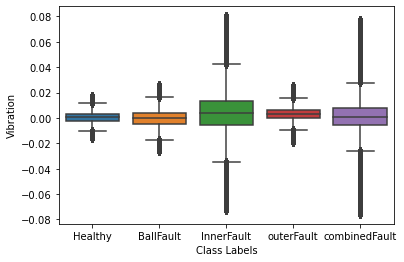

In [ ]:
import seaborn as sns 
g = sns.boxplot(x = 'Faults',y = 'vibration_SMA', data = alldataset)

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Class Labels")
#plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig("../figures/filtered/vibration amplitudes vs speed.png", bbox_inches='tight', dpi=1200)

<AxesSubplot:>

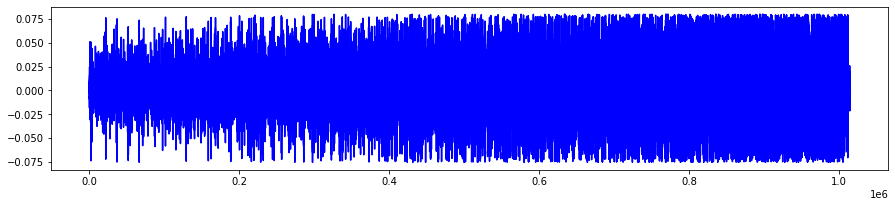

In [ ]:
alldataset['vibration_SMA'].plot(color='b',figsize = (15,3))

In [ ]:
alldataset.to_csv(r'../datasets/filtered/alldataset.csv',index = False);

In [ ]:
BIO_datasets = BallFault
BIO_datasets = BIO_datasets.append(InnerFault)
BIO_datasets = BIO_datasets.append(outerFault)
BIO_datasets

,speed,vibration,vibration_SMA,Faults
0,0.036346,0.001747,-0.002607,BallFault
1,0.036346,0.003720,-0.002614,BallFault
2,0.036346,0.004377,-0.002607,BallFault
3,0.039634,0.005693,-0.002587,BallFault
4,0.036017,0.005693,-0.002601,BallFault
...,...,...,...,...
1009408,0.037332,-0.004501,-0.003567,outerFault
1009409,0.037003,-0.003515,-0.003015,outerFault
1009410,0.037332,-0.006803,-0.002923,outerFault
1009411,0.037003,-0.010749,-0.002897,outerFault


<AxesSubplot:>

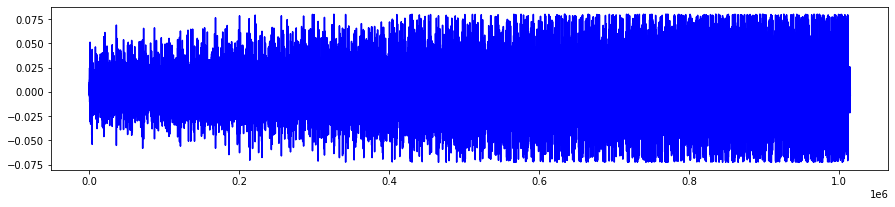

In [ ]:
BIO_datasets['vibration_SMA'].plot(color='b',figsize = (15,3))

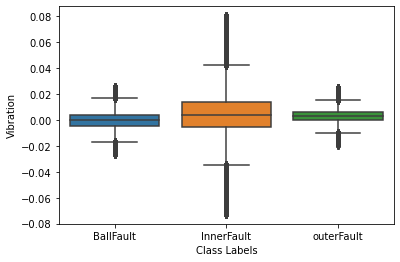

In [ ]:
g = sns.boxplot(x = 'Faults',y = 'vibration_SMA', data = BIO_datasets)

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Class Labels")
#plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig("../figures/filtered/Three datasets vibration amplitudes vs speed.png", bbox_inches='tight', dpi=1200)

In [ ]:
BIO_datasets.to_csv(r'../datasets/filtered/3dataset.csv',index = False);